# Task 1: Probability Theory

## Option: The Birthday Problem and The Height Simulation

This task addresses two probability problems: the **Birthday Problem**, which involves a *discrete random variable* following an approximately *binomial distribution*, and the **height distribution**, which involves a *continuous random variable* following a *normal distribution*. For each experiment, the expected value and standard deviation are calculated through simulations in Python.

The **Birthday Problem** is a well-known probability puzzle that asks: "*What is the probability that at least two people in a group share the same birthday?*" Despite the seemingly low odds, the probability of shared birthdays increases rapidly as the size of the group grows. This problem involves a discrete random variable because the number of people sharing the same birthday can take only distinct integer values. For example, with 23 people, there is approximately a 50% chance that two people share a birthday. The problem is closely associated with the binomial distribution in approximating probabilities for discrete outcomes. The Birthday Problem has applications in fields such as cryptography, where it is used in "**birthday attacks**" to find hash collisions, a situation where two different inputs produce the same hash output. This highlights the practical importance of understanding collision probabilities in security.

The **Height Simulation** is based on the assumption that human heights in a population follow a normal distribution. This means most people are of average height, with fewer individuals being extremely short or tall. In this example, the heights of a simulated population of 10.000 people are generated, assuming a mean height of 170 cm and a standard deviation of 10 cm. Heights are modeled as a continuous random variable, meaning that any value within the range is possible. The normal distribution is used to represent the spread of heights across the population. Normal distributions are fundamental in statistical modeling because many real-world variables (like height, test scores, etc.) are approximately normally distributed. This simulation shows how well the normal distribution fits real-world phenomena, even when generated randomly.

> **NOTE**: This Notebook has been runned using a Conda environment as Kernel, using a Python 3.11.7 version.

## Approach

1. **Birthday Problem**: The Birthday Problem is simulated for a group of people of varying sizes (from 5 to 50), and the probability that at least two people share the same birthday is calculated.
   
2. **Height Simulation**: The distribution of heights in a population of 10.000 people is simulated, assuming a normal distribution with a mean height of 170 cm and a standard deviation of 10 cm.

For both simulations:
- Enough simulations were runned to approximate the expected value and standard deviation of the random variables.
- The distributions obtained from the simulated experiments are plotted.


## Manual Calculations

1. **Birthday Problem**: 
   The probability of at least two people sharing the same birthday in a group of $n$ people can be expressed as:
  
   $$P(\text{same birthday}) = 1 - P(\text{no shared birthdays})$$

   Where:
   $$P(\text{no shared birthdays}) = \frac{365}{365} \times \frac{364}{365} \times \cdots \times \frac{365-n+1}{365}$$
 
   This formula calculates the probability that no two people in the group share a birthday. Simulations will estimate this probability.

2. **Height Simulation**: 
   The heights of individuals are assumed to follow a normal distribution $N(\mu, \sigma)$, where:
  
   $$\mu = 170 \, \text{cm}, \quad \sigma = 10 \, \text{cm}$$
   
   The expected value of the height is $\mu = 170 \, \text{cm}$, and the standard deviation is $\sigma = 10 \, \text{cm}$. The simulations will validate whether the mean and standard deviation match the theoretical values.


## Code

In [1]:
# Importing the Python's libraries used to resolve both the problems.
import numpy as np
import matplotlib.pyplot as plt

### Birthday Problem Simulation

Here is shown the Birthday Problem simulation for a group of a given size, over a specified number of simulations, and returns the probability of at least two people sharing the same birthday along with the standard deviation of the results.

In [2]:
def simulate_birthday_problem(group_size, n_simulations):
    # List to store whether each simulation results in a shared birthday
    shared_birthday_results = []
    
    # Loop through the number of simulations
    for _ in range(n_simulations):
        birthdays = np.random.randint(0, 365, group_size) # Generation of raandom birthdays for a group.
        shared_birthday = len(birthdays) != len(set(birthdays))
        shared_birthday_results.append(shared_birthday)
    
    # Calculate probability (mean) of shared birthdays
    prob_shared_birthday = np.mean(shared_birthday_results)
    
    # Calculate standard deviation
    std_dev_shared_birthday = np.std(shared_birthday_results)
    
    return prob_shared_birthday, std_dev_shared_birthday

### Run Birthday Simulation

This cell of code prints the expected values and the standard deviation of shared birthdays, running the ```simulate_birthday_problem()``` function defined above. Two crucial parameters are defined: the *group size* of $23$, to verify the theoretical result, and the *number of simulations*, which turns out to be a large enough number to run the experiment many times.

In [3]:
# Parameters
group_size = 23
n_simulations = 10000
prob_shared_birthday, std_dev_shared_birthday = simulate_birthday_problem(group_size, n_simulations)

print(f"Expected value (mean probability) of shared birthdays: {prob_shared_birthday:.2f}\n") #.2f is used as a format specifier to control how a floating-point number is displayed.
print(f"Standard deviation of shared birthdays: {std_dev_shared_birthday:.2f}")

Expected value (mean probability) of shared birthdays: 0.52

Standard deviation of shared birthdays: 0.50


### Testing an edge case

It's interesting to understand what happens when a small group size is considered, to show when the probability of shared birthdays is nearly zero, and also for a maximum group size, where the probability is near to 1.

In [4]:
group_sizes = [1, 2, 365]  # Testing extreme small and maximum group size
for group_size in group_sizes:
    prob_shared_birthday, std_dev_shared_birthday = simulate_birthday_problem(group_size, n_simulations)
    print(f"Group Size: {group_size} -> Prob of shared birthday: {prob_shared_birthday:.2f}, Std Dev: {std_dev_shared_birthday:.2f}\n")

Group Size: 1 -> Prob of shared birthday: 0.00, Std Dev: 0.00

Group Size: 2 -> Prob of shared birthday: 0.00, Std Dev: 0.04

Group Size: 365 -> Prob of shared birthday: 1.00, Std Dev: 0.00



### Plot for Birthday Problem

Here is shown the plot for the Birthday Problem, using a *line chart* to describe the runned simulation.

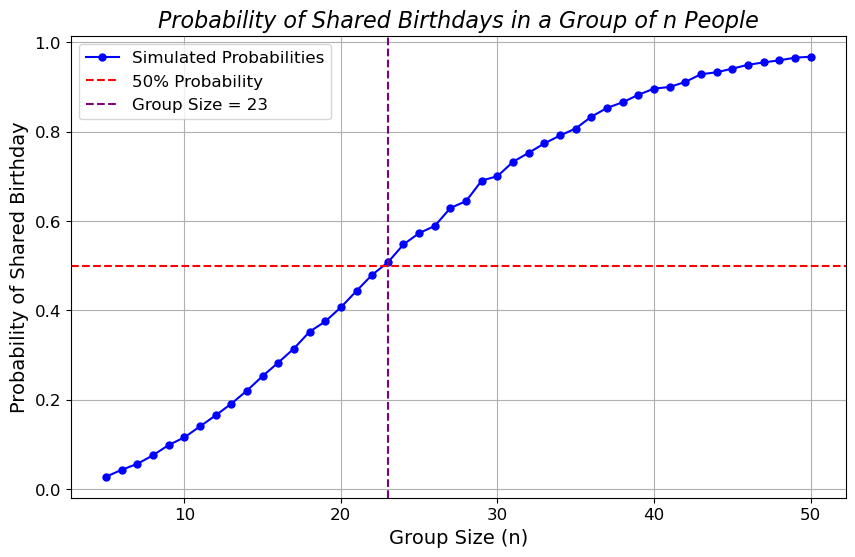

In [5]:
def plot_birthday_problem():
    group_sizes = range(5, 51)  # Group sizes from 5 to 50
    probabilities = [simulate_birthday_problem(n_people, n_simulations)[0] for n_people in group_sizes]

    plt.figure(figsize=(10, 6))
    plt.plot(group_sizes, probabilities, marker='o', linestyle='-', color='blue', markersize=5, label="Simulated Probabilities")
    plt.title('Probability of Shared Birthdays in a Group of n People', fontsize=16, fontstyle='italic')
    plt.xlabel('Group Size (n)', fontsize=14)
    plt.ylabel('Probability of Shared Birthday', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axhline(y=0.5, color='r', linestyle='--', label='50% Probability')
    plt.axvline(x=23, color='purple', linestyle='--', label='Group Size = 23')
    plt.legend(loc="upper left", fontsize=12)
    plt.grid(True)
    plt.show()

plot_birthday_problem()

### Height Simulation

Here is shown the Height Simulation, based on a normal distribution. The function uses ```np.random.normal()``` to generate random heights for the specified number of people and returns an array of simulated heights.

In [6]:
def height_simulation(n_people, mean_height, std_dev_height):
    return np.random.normal(mean_height, std_dev_height, n_people)

### Run Height Simulation

This cell of code runs the ```height_simulation()``` function, using specified parameters for mean height and standard deviation. It then calculates and displays the expected height (mean) and the standard deviation of the simulated data for a group of $10.000$ people.

In [7]:
# Parameters for height simulation
mean_height = 170  # cm
std_dev_height = 10  # cm
n_people = 10000

heights = height_simulation(n_people, mean_height, std_dev_height)

expected_height = np.mean(heights)
std_dev_height_sim = np.std(heights)

print(f"Expected height (mean): {expected_height:.2f} cm\n")
print(f"Standard deviation of height: {std_dev_height_sim:.2f} cm")

Expected height (mean): 170.07 cm

Standard deviation of height: 10.10 cm


### Testing an edge case

It's interesting to understand what happens when a small group of population is considered, to show how the mean and standard deviation change with small sample sizes, and also for a large population size for scaling.

In [8]:
population_sizes = [1, 2, 100000]  # Testing small and large population sizes
for pop_size in population_sizes:
    heights = height_simulation(pop_size, mean_height, std_dev_height)
    expected_height = np.mean(heights)
    std_dev_height_sim = np.std(heights)
    print(f"Population Size: {pop_size} -> Mean Height: {expected_height:.2f} cm, Std Dev: {std_dev_height_sim:.2f} cm\n")

Population Size: 1 -> Mean Height: 179.13 cm, Std Dev: 0.00 cm

Population Size: 2 -> Mean Height: 172.94 cm, Std Dev: 7.55 cm

Population Size: 100000 -> Mean Height: 170.04 cm, Std Dev: 9.99 cm



### Plot for Height Distribution

Here is shown the plot for the Height Simulation, using a *bar chart* to show the distribution.

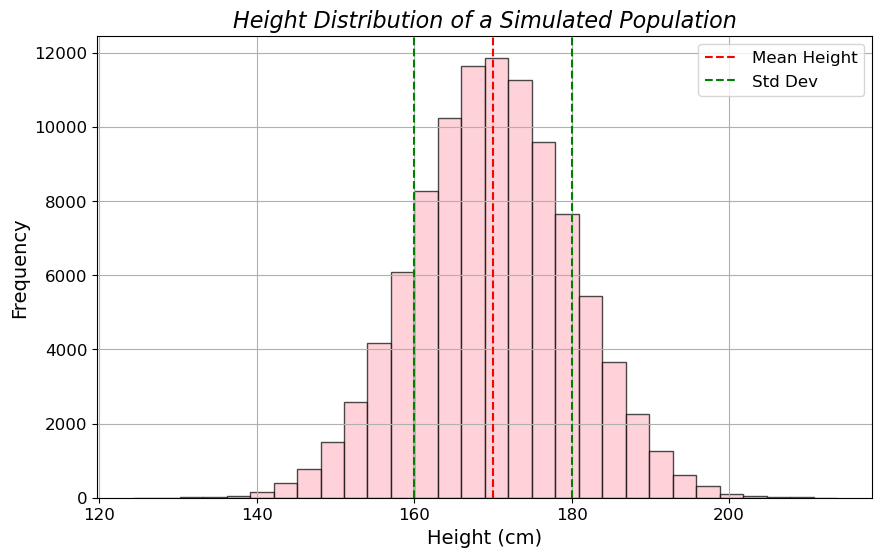

In [9]:
def plot_height_distribution(heights):
    plt.figure(figsize=(10, 6))
    plt.hist(heights, bins=30, color='pink', edgecolor='black', alpha=0.7)
    plt.title('Height Distribution of a Simulated Population', fontsize=16, fontstyle='italic')
    plt.xlabel('Height (cm)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(x=mean_height, color='red', linestyle='--', label='Mean Height')
    plt.axvline(x=mean_height + std_dev_height, color='green', linestyle='--', label='Std Dev')
    plt.axvline(x=mean_height - std_dev_height, color='green', linestyle='--')
    plt.legend(loc="upper right", fontsize=12)
    plt.grid(True)
    plt.show()

plot_height_distribution(heights)

## Results

### 1. Birthday Problem

The simulated probability of at least two people sharing a birthday in a group of $23$ people is approximately $50\%$, which aligns with theoretical expectations. As the group size is increased, the probability rapidly approaches $1$, showing that even for relatively small groups, the chances of a shared birthday are higher than most would intuitively expect.

**Key observations**:

- For group sizes below $10$, the probability is quite low, but beyond $20$, it increases steeply, as shown in the [Plot](#plot-for-birthday-problem).
- For $23$ people, the simulated probability closely matches the widely known result of $50\%$.
- For $50$ people, the probability is almost $100\%$, reinforcing the combinatorial nature of the problem.

By increasing the number of simulations, the accuracy of the results improves, and the standard deviation decreases. This demonstrates the **law of large numbers**, which states that as the number of trials increases, the simulation results converge to the theoretical probabilities.

### 2. Height Simulation

In the height simulation, the average simulated height for a population of $10.000$ people is very close to the theoretical mean of $170$ cm, and the standard deviation is also consistent with the expected $10$ cm. This confirms the assumption that human heights are approximately normally distributed.

**Key observations**:

- The simulated mean height was approximately $170.07$ cm, and the standard deviation was close to $10.10$ cm, indicating a strong alignment with the theoretical values.
- The [histogram](#plot-for-height-distribution) of the height distribution follows the familiar **bell-shaped curve** of the normal distribution, with the majority of individuals clustered around the mean.

The closeness of the simulated values to the theoretical mean and standard deviation demonstrates the reliability of the normal distribution model for height. The use of a large sample size ($10.000$ people) ensures that the distribution resembles the theoretical curve more accurately.

## Conclusion

Overall, the simulations provide strong empirical evidence for the theoretical properties of both *binomial* and *normal* distributions. The results closely align with theoretical expectations, confirming that simulations can effectively approximate these distributions when enough trials are run. Through the process of simulation, we can also observe how random variation and sample size affect the outcomes and how increasing the number of simulations improves the reliability of estimates.

-----------------------

# Task 2: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


### Importing Dependencies

Ther will be a usage of *pandas* for data handling, *matplotlib* for plotting, and *scikit-learn* for building and testing the Naive Bayes classifier.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Reading and Visualizing the Data

This task uses a dataset of heights, weights, and genders. The first things to do are loading the dataset, inspecting the first few rows, and then visualizing the data with a scatter plot to see if there is a reasonable separation between the genders based on height and weight.

In [12]:
# Read the data from the .csv, using the first row as the headers of the data.
data = pd.read_csv('01_heights_weights_sex.csv', header=0)

# Show just the first few samples to understand if it's read correctly.
data.head(n=3)

,Sex,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

To visualize the data, a scatter plot will be used. The points will be colored based on the gender; there's a conversion for the '**Sex**' column into numeric format: $1$ for '**Male**', $0$ for '**Female**', to color the points.

In [14]:
# Map 'Sex' column to numbers (1 = Male, 0 = Female)
data['Gender_int'] = data['Sex'].apply(lambda x: 1 if x == 'Male' else 0)

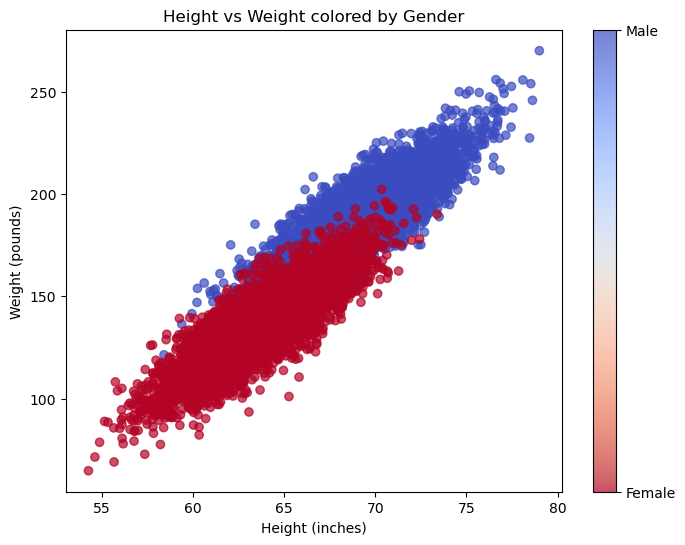

In [15]:
# Scatter plot to visualize Height vs Weight, colored by Gender
plt.figure(figsize=(8,6))
plt.scatter(data['Height'], data['Weight'], c=data['Gender_int'], cmap='coolwarm_r', alpha=0.7)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight colored by Gender')

# Add colorbar with proper labeling
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Female', 'Male'])
plt.show()

#### Discuss: *There is reasonable separation?*

Based on the scatter plot of height vs. weight, it can be observed a separation between males and females. Generally, males tend to have higher heights and weights compared to females, which creates a visible clustering of male points in the upper right region of the plot, while females tend to cluster towards the lower left.

However, there is some overlap between the two groups, especially in the middle range of heights and weights, which could make it challenging for the classifier to perfectly distinguish between the two genders. While the overall pattern suggests that height and weight are useful features for classification, some misclassifications in areas where the two groups overlap could be expected.

In conclusion, there's a separation, but not so reasonable.

### Defining Features and Labels

$X$ will be the features (*Height* and *Weight*), and $y$ will be the label (*Sex*). 

> **NOTE**: just for clarification, a *feature* is an individual and measurable property of an observed phenomenon, a *label* is for raw data identification process.

In [17]:
X = data[['Height', 'Weight']]  # Features
y = data['Gender_int']      # Labels (0 for Female, 1 for Male)

### Train/Test Split

A goal of machine learning (supervised learning, in particular) is to build a model that performs well on new data. If there's new data, it’s a good idea to see how a model performs on it. The problem is that there may not be new data, but there's the possibility to simulate this experience with a procedure like **Train/Test split**, a model validation process that allows to simulate how a model would perform with new data. 

There will be a split of the data into training and testing sets: $33\%$ of the data will be used for **testing**, while the remaining $67\%$ will be used for **training**.

In [19]:
# Split the data into training (67%) and testing (33%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

# Prints the sizes of both sets to verify the split.
print(f"Training data size: {X_train.shape[0]} samples\n")
print(f"Test data size: {X_test.shape[0]} samples")

Training data size: 6700 samples

Test data size: 3300 samples


### Train the algorithm

The **Gaussian Naive Bayes** is a machine learning classification technique based on a probablistic approach that assumes each class follows a normal distribution. It assumes each parameter has an independent capacity of predicting the output variable. It is able to predict the probability of a dependent variable to be classified in each group.

The Gaussian Naive Bayes classifier from *sklearn* to train the model on the training data will be used.

In [21]:
gnb = GaussianNB() # Initialize the Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train) # Train the model

GaussianNB()

### Test the algorithm

 After training, the test data to predict the labels and then evaluate the model's performance will be used.

In [22]:
y_pred = gnb.predict(X_test) # Predict on the test data

### Calculating accuracy

Accuracy refers to how close a measurement is to the true or accepted value. The accuracy score is the ratio of correct predictions to the total number of predictions.

In [24]:
#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Naive Bayes Classifier: {accuracy:.2f}')

Accuracy of the Naive Bayes Classifier: 0.89


### Testing with Confusion Matrix and Classification Report

In order to evaluate more deeply the classifier, there will be an examination of the *confusion matrix*, which shows how many true positives, false positives, true negatives, and false negatives the model produced. Also, there will be a *classification report*, which explains how well a model is doing in different aspects of classification.

In [25]:
# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Breakdown of confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives: {tn}, False Positives: {fp}")
print(f"False Negatives: {fn}, True Positives: {tp}\n")

# Print classification report for precision, recall, and f1-score
print(classification_report(y_test, y_pred, target_names=['Female', 'Male']))

Confusion Matrix:
 [[1478  163]
 [ 211 1448]]

True Negatives: 1478, False Positives: 163
False Negatives: 211, True Positives: 1448

              precision    recall  f1-score   support

      Female       0.88      0.90      0.89      1641
        Male       0.90      0.87      0.89      1659

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



### Generating Random Samples

Now, there will be the generation of $5000$ random samples of height and weight between reasonable ranges.
These ranges are based on the minimum and maximum values in the original data.

In [26]:
def generate_random_samples(data, n_samples=5000):
    """Generate random height and weight samples based on the data range."""
    random_heights = np.random.uniform(low=data['Height'].min(), high=data['Height'].max(), size=n_samples)
    random_weights = np.random.uniform(low=data['Weight'].min(), high=data['Weight'].max(), size=n_samples)
    return pd.DataFrame({'Height': random_heights, 'Weight': random_weights})

# Generate random samples
random_samples = generate_random_samples(data)

### Predicting Gender for Random Samples

The trained Naive Bayes model will be used to predict the gender for the random samples.

In [27]:
random_predictions = gnb.predict(random_samples) # Predict gender for the random samples

### Plot the Random Samples

The random samples will be plotted, colored by the predict gender, to visualize the decision boundary of the classifier.

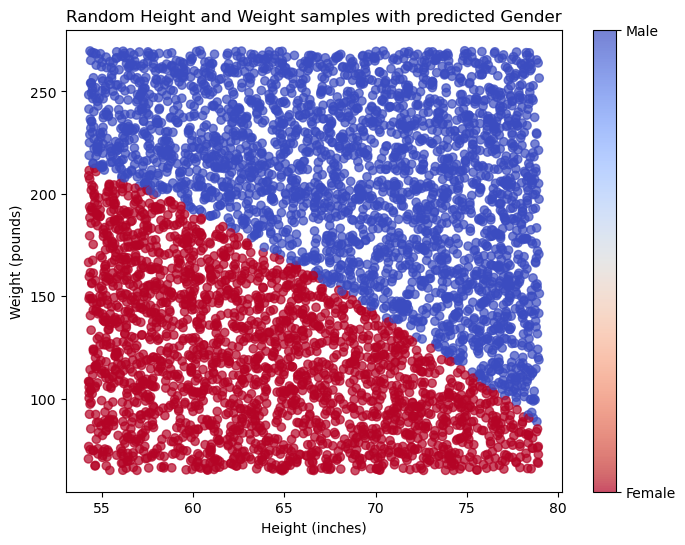

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(random_samples['Height'], random_samples['Weight'], c=random_predictions, cmap='coolwarm_r', alpha=0.7)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Random Height and Weight samples with predicted Gender')

# Add colorbar with proper labeling
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Female', 'Male'])
plt.show()

## Discussion

The Naive Bayes classifier performs reasonably well, as seen from the accuracy score of $0.89$ and the confusion matrix. The scatter plot of random samples shows the decision boundary, indicating that the model can generally distinguish between males and females based on height and weight, although there may be misclassifications, particularly where height and weight overlap between genders.

Naive Bayes assumes independence between features (height and weight in this case), which might not be entirely accurate. More advanced classifiers (like SVM or Random Forests) could potentially improve classification by capturing more complex relationships between these features.

-------------

# Task 3 - Exploration

## Focus on Reinforcement Learning: Methods and Applications

Reinforcement Learning (RL) is a branch of machine learning where an agent learns by interacting with its environment, receiving feedback through rewards or punishments. This feedback loop allows the agent to adjust its actions to maximize cumulative rewards over time, forming a trial-and-error process similar to human learning. This mechanism is particularly powerful for tasks that require sequential decision-making in real-time environments. One notable example is autonomous driving, where RL enables self-driving cars to navigate roads safely by making decisions based on continuous feedback from sensors. Tesla, Waymo, and other leading companies utilize RL to allow vehicles to learn from complex, ever-changing road conditions, ensuring that they can adapt dynamically. The ability to receive real-time rewards or penalties for actions, like avoiding a collision or breaking traffic laws, makes RL a natural fit for this kind of application (*Kiran et al., 2021; Sutton & Barto, 2018*).

In contrast, supervised learning relies on static labeled datasets and cannot handle the dynamic nature of real-world environments. A supervised learning model trained on past driving data would struggle when faced with unpredictable road conditions, such as sudden lane changes by other drivers or road construction. RL, however, thrives in these situations because the agent can continuously update its policy based on ongoing feedback from the environment, making it more adaptive and responsive. Unsupervised learning, which focuses on pattern recognition without feedback, is also less effective in autonomous driving, where decision-making is crucial. RL’s capacity to balance **exploration** (trying new strategies) and **exploitation** (optimizing known strategies) allows it to learn complex behaviors that other methods cannot easily achieve (*Arulkumaran et al., 2017; Li, 2017*).

In game AI, RL's reward-punishment framework plays a significant role in training systems to master competitive environments. **AlphaGo** and **OpenAI**’s Dota 2 agents have become famous examples, using RL to learn winning strategies through millions of game simulations. Every move in the game can lead to either a reward (winning a match) or a penalty (losing), allowing the AI to refine its strategy over time by adjusting its actions based on these outcomes. Unlike supervised learning, which would require a prohibitively large dataset of all possible game states and optimal actions, RL allows the agent to develop strategies autonomously through trial and error. This is a key advantage in games where long-term strategy and cumulative rewards are critical (*Silver et al., 2016; Vinyals et al., 2019*).

RL also has notable applications in the financial sector, where trading algorithms must constantly adapt to variable market conditions. The reward structure in RL -such as achieving a profit or avoiding a loss- guides the algorithm to improve its trading strategy over time. Supervised learning, which depends on historical data, often fails in such scenarios because markets are non-stationary, and past trends do not always predict future behavior. RL, by contrast, excels in these environments by learning from delayed rewards and dynamically adapting to shifting market conditions. This has led to RL’s application in real-time trading strategies, portfolio management, and risk assessment, where flexibility and the ability to learn from feedback are crucial (*Lapan, 2018; Moody & Saffell, 2001*). Additionally, RL’s application extends into resource allocation in cloud computing, where tasks like load balancing benefit from the real-time feedback loop that RL provides (*Mao et al., 2016*).

### References:

- Arulkumaran, K., Deisenroth, M. P., Brundage, M., & Bharath, A. A. (2017). "*A Brief Survey of Deep Reinforcement Learning*." IEEE Signal Processing Magazine, 34(6), 26-38.
- Kiran, B. R., Sobh, I., Talpaert, V., Mannion, P., Al Sallab, A., Yogamani, S., & Pérez, P. (2021). "*Deep Reinforcement Learning for Autonomous Driving: A Survey.*" IEEE Transactions on Intelligent Transportation Systems, 22(6), 3563-3575.
- Lapan, M. (2018). *Deep Reinforcement Learning Hands-On*. Packt Publishing.
- Li, Y. (2017). "*Deep Reinforcement Learning: An Overview.*" arXiv preprint arXiv:1701.07274.
- Mao, H., Alizadeh, M., Menache, I., & Kandula, S. (2016). "*Resource Management with Deep Reinforcement Learning.*" Proceedings of the 15th ACM Workshop on Hot Topics in Networks.
- Moody, J., & Saffell, M. (2001). "*Learning to Trade via Direct Reinforcement.*" IEEE Transactions on Neural Networks, 12(4), 875-889.
- Silver, D., et al. (2016). "*Mastering the Game of Go with Deep Neural Networks and Tree Search.*" Nature, 529(7587), 484-489.
- Sutton, R. S., & Barto, A. G. (2018). "*Reinforcement Learning: An Introduction*". MIT Press.
- Vinyals, O., et al. (2019). "*Grandmaster Level in StarCraft II using Multi-Agent Reinforcement Learning.*" Nature, 575(7782), 350-354.